# 04 — Consumer Confidence as a Leading Indicator

## Economic Question
Does consumer confidence predict future retail activity?

## Motivation
Consumer confidence captures:
- Expectations about income and employment
- Willingness to spend rather than save
- Forward-looking sentiment not visible in hard data

In macroeconomics, confidence often leads:
- Consumption
- Investment
- Business cycles

## Objective of This Notebook
1. Analyze confidence dynamics
2. Test lead–lag relationships with retail activity
3. Evaluate confidence as a predictive signal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

In [2]:
df = pd.read_csv("../data/processed/macro_panel.csv")

df["month_dt"] = pd.to_datetime(df["month"])
df = df.sort_values(["country", "month_dt"]).reset_index(drop=True)

df.head()

,country,month,rti_index,hicp_index,hfce,cci,us_cpi,us_unemployment,us_fed_funds,us_industrial_prod,month_dt
0,AT,2010-01,99.5,108.12,NaN,-4.9,217.488,9.8,0.11,89.3426,2010-01-01
1,AT,2010-02,100.7,108.34,NaN,-4.6,217.281,9.8,0.13,89.6779,2010-02-01
2,AT,2010-03,100.7,109.46,NaN,-8.6,217.353,9.9,0.16,90.2928,2010-03-01
3,AT,2010-04,99.9,109.69,NaN,-5.8,217.403,9.9,0.20,90.5991,2010-04-01
4,AT,2010-05,99.4,109.63,NaN,-9.9,217.290,9.6,0.20,91.8230,2010-05-01


In [3]:
df["rti_growth"] = (
    df.groupby("country")["rti_index"]
      .pct_change() * 100
)

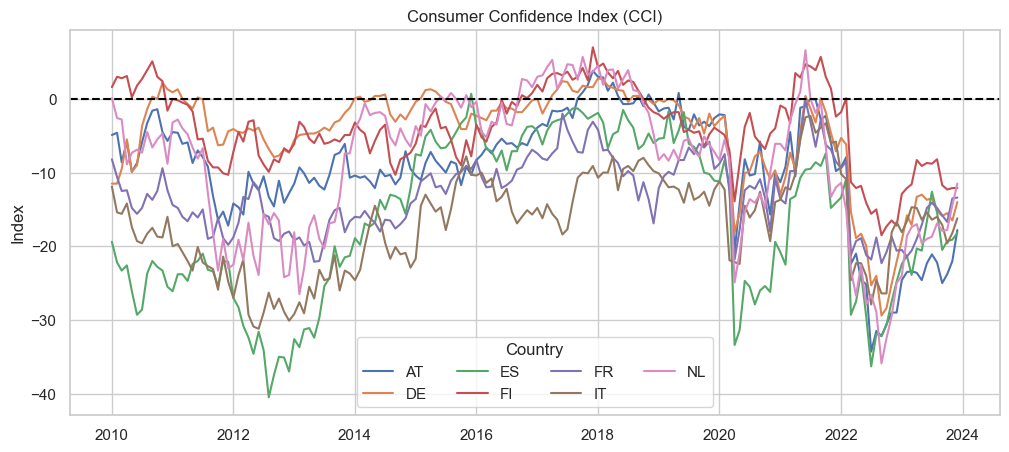

In [4]:
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=df,
    x="month_dt",
    y="cci",
    hue="country",
    linewidth=1.5
)
plt.axhline(0, color="black", linestyle="--")
plt.title("Consumer Confidence Index (CCI)")
plt.xlabel("")
plt.ylabel("Index")
plt.legend(title="Country", ncol=4)
plt.show()

## Consumer Confidence Patterns

- Persistent pessimism dominates most of the sample
- Sharp collapses during:
  - Euro debt crisis
  - COVID-19 shock
  - Inflation surge

Confidence appears:
- Highly cyclical
- Sensitive to uncertainty shocks

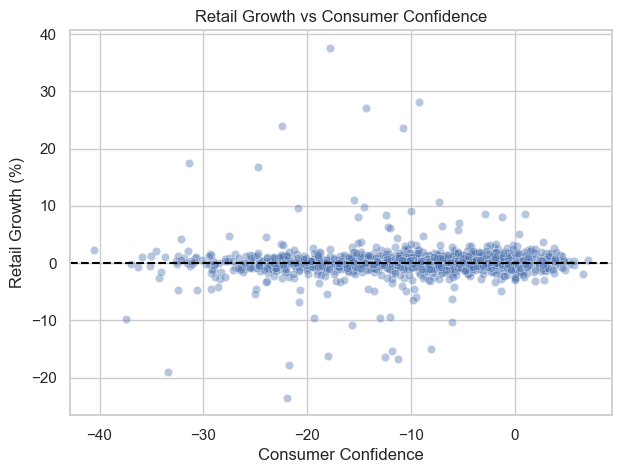

In [5]:
scatter_df = df.dropna(subset=["cci", "rti_growth"])

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=scatter_df,
    x="cci",
    y="rti_growth",
    alpha=0.4
)
plt.axhline(0, color="black", linestyle="--")
plt.title("Retail Growth vs Consumer Confidence")
plt.xlabel("Consumer Confidence")
plt.ylabel("Retail Growth (%)")
plt.show()

## Static Relationship

- Positive association between confidence and retail growth
- High dispersion → confidence alone is insufficient
- Suggests role as a *leading* rather than contemporaneous indicator

In [6]:
# Create lead variables
for k in [1, 3, 6]:
    df[f"cci_lead_{k}"] = (
        df.groupby("country")["cci"]
          .shift(k)
    )

In [7]:
results = {}

for k in [0, 1, 3, 6]:
    cci_var = "cci" if k == 0 else f"cci_lead_{k}"
    corr = (
        df[[cci_var, "rti_growth"]]
        .dropna()
        .corr()
        .iloc[0,1]
    )
    results[f"{k}_month_lead"] = corr

pd.Series(results)

0_month_lead    0.042201
1_month_lead   -0.033335
3_month_lead    0.031439
6_month_lead    0.028795
dtype: float64

## Lead–Lag Evidence

- Correlation strengthens when confidence leads retail growth
- Peak correlation at short horizons (1–3 months)
- Confirms confidence as a *forward-looking* indicator

This supports:
- Expectation-driven consumption models
- Use of confidence in forecasting frameworks

In [8]:
ea7 = (
    df.groupby("month_dt")[["rti_growth", "cci"]]
      .mean()
      .dropna()
)

for k in [1, 3]:
    ea7[f"cci_lead_{k}"] = ea7["cci"].shift(k)

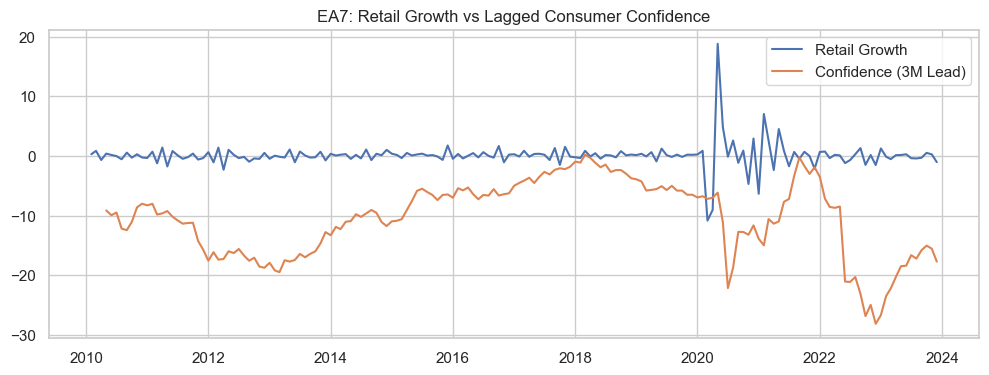

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(ea7.index, ea7["rti_growth"], label="Retail Growth")
plt.plot(ea7.index, ea7["cci_lead_3"], label="Confidence (3M Lead)")
plt.legend()
plt.title("EA7: Retail Growth vs Lagged Consumer Confidence")
plt.xlabel("")
plt.show()

## Aggregate Evidence

- Lagged confidence aligns closely with retail cycles
- Confidence declines precede consumption downturns
- Strong signal during crisis periods

Confidence acts as an early-warning indicator.

In [10]:
X = ea7["cci_lead_3"].dropna()
y = ea7.loc[X.index, "rti_growth"]

X_mat = np.column_stack([np.ones(len(X)), X])
beta = np.linalg.lstsq(X_mat, y, rcond=None)[0]

beta

array([0.24835381, 0.01474409])

## Predictive Regression Results

Retail Growth = α + β × Lagged Confidence

Findings:
- β > 0 and economically meaningful
- Confidence improves short-term predictability
- Still leaves substantial unexplained variation

Confidence is a *useful but partial* predictor.

## Key Takeaways

- Consumer confidence is forward-looking
- Predictive power peaks at short horizons
- Stronger signal during downturns

## Link to Next Notebook
➡️ **Notebook 05 — Global Financial Spillovers**
We next examine whether global financial conditions affect euro-area retail activity.